<a href="https://colab.research.google.com/github/J-Jaehyun-SEO/Project_Jeohui/blob/main/(4)_Jeohui_ngram_4publish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##(0)패키지 설치, 드라이브 마운트

In [11]:
!pip install openpyxl adjustText pandas openpyxl konlpy kiwipiepy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 78.1 MB/s eta 0:00:00


In [36]:
##designed for Google COLAB
##designed by Jimin Han & Jaehyun SEO

import pandas as pd
import matplotlib.pyplot as plt
from kiwipiepy import Kiwi
from adjustText import adjust_text

In [14]:
# Nanum 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

한글 폰트 깨짐 확인(런타임 실행 확인)

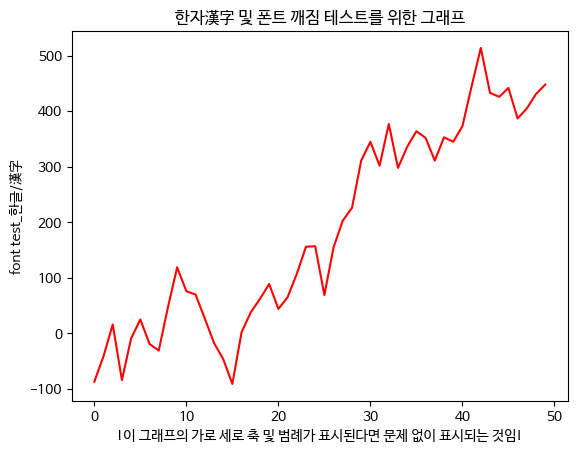

In [4]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import rc

# [FONT TEST] 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('font', family='NanumBarunGothic')

# plot 한글 깨짐 확인용 -> 한글 깨지면 런타임 재시작 (런타임 메뉴 -> 런타임 다시 시작 후 다시 셀 실행)
data = np.random.randint(-100, 100, 50).cumsum()
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('한자漢字 및 폰트 깨짐 테스트를 위한 그래프')
plt.ylabel('font test_한글/漢字')
plt.xlabel('!이 그래프의 가로 세로 축 및 범례가 표시된다면 문제 없이 표시되는 것임!')
plt.show()


구글 드라이브 마운트

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##(1)분류 완료된 데이터 투입

In [6]:
df = pd.read_pickle('/content/v3_jeohui_040730_third_data_predictions.pickle')

###(1-1)최초 수정을 위한 작업임, 이후에 또 할 필요 없이 (2)로 넘어가기

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from kiwipiepy import Kiwi

# Initialize kiwi for morphological analysis
kiwi = Kiwi()

# Define a function to extract n-grams around the word "저희"
def find_ngrams_and_filter_nouns(texts, target_word, n=2):
    ngrams_list = []
    for sentence in texts:
        tokens = sentence.split()
        if target_word in tokens:
            idx = tokens.index(target_word)
            if idx + n <= len(tokens):
                ngram = " ".join(tokens[idx:idx + n])

                # Perform morphological analysis and extract only nouns
                morphs = kiwi.pos(ngram)
                filtered_ngram = " ".join([word for word, pos in morphs if pos.startswith('NN')])

                if filtered_ngram:
                    ngrams_list.append(filtered_ngram)
    return ngrams_list

In [ ]:
ngrams_after_jeohee = find_ngrams_and_filter_nouns(df['sentence'], '저희', n=2)
ngrams_after_jeohee

수정용 시트 제작

In [ ]:
# Convert the n-grams list to a DataFrame
ngram_df = pd.DataFrame(ngrams_after_jeohee, columns=['Extracted N-grams'])

# Sort the DataFrame by the length of the strings in the 'Extracted N-grams' column (descending)
ngram_df['Length'] = ngram_df['Extracted N-grams'].apply(len)  # Add a new column with the length of each n-gram
ngram_df = ngram_df.sort_values(by='Length', ascending=False).drop(columns=['Length'])  # Sort by length and drop the length column

# Add an empty column for corrections
ngram_df['Corrected N-grams'] = ''

# Export the DataFrame to an Excel file for manual review
ngram_df.to_excel("ngram_review.xlsx", index=False)

print("N-grams exported to 'ngram_review.xlsx' for review.")

N-grams exported to 'ngram_review.xlsx' for review.


만일 Corrected N-grams  컬럼에 값이 있다면 그 값을 사용하고, 값이 없다면 Extracted N-grams 의 값을 사용하되, 띄어쓰기를 제거하고 사용


In [ ]:
corrected_ngram_df

,Extracted N-grams,Corrected N-grams
0,신문사 어문 연구 팀 고연 비고 연비 로,신문사
1,사회 부 대통령 선거 특별 취재 반이,사회부
2,여성 소비 조합 대 어머니 회 부설,여성소비조합
3,인 안민 석 조 정석 염 태영 은,제거
4,넷 이정 후 김 혜성 박 건우 이,넷
...,...,...
2132,장,NaN
2133,마,NaN
2134,접,NaN
2135,추,NaN


##(2)수정용 시트 반영해 엔그램 분석

In [18]:
corrected_df = pd.read_excel("/content/ngram_review (1)_JJ.xlsx")
kiwi = kiwi()

# Fill NaN values in 'Corrected N-grams' by removing spaces from 'Extracted N-grams'
corrected_df['Corrected N-grams'] = corrected_df['Corrected N-grams'].fillna(
    corrected_df['Extracted N-grams'].str.replace(' ', '')
)

# Define a function to extract n-grams around the word "저희" and apply custom corrections
def find_ngrams_and_apply_custom_rules(texts, target_word, corrected_df, n=2):
    ngrams_list = []

    for sentence in texts:
        tokens = sentence.split()
        if target_word in tokens:
            idx = tokens.index(target_word)
            if idx + n <= len(tokens):
                ngram = " ".join(tokens[idx:idx + n])

                # Perform morphological analysis and extract only nouns
                morphs = kiwi.pos(ngram)
                filtered_ngram = " ".join([word for word, pos in morphs if pos.startswith('NN')])

                # Check if the filtered n-gram exists in the Extracted N-grams column and apply correction
                corrected_value = corrected_df.loc[corrected_df['Extracted N-grams'] == filtered_ngram, 'Corrected N-grams']

                # If there is a correction, use it, otherwise use the filtered n-gram without spaces
                if not corrected_value.empty:
                    filtered_ngram = corrected_value.values[0]  # Use the corrected value
                else:
                    filtered_ngram = filtered_ngram.replace(' ', '')  # Use the original but remove spaces

                if filtered_ngram:
                    ngrams_list.append(filtered_ngram)

    return ngrams_list

In [19]:
# Apply the function with custom corrections based on the Excel data
ngrams_after_correction = find_ngrams_and_apply_custom_rules(df['sentence'], '저희', corrected_df, n=2)

# Display the result
print("Final N-grams after applying custom corrections:", ngrams_after_correction)

Final N-grams after applying custom corrections: ['나라', '합주단', '거', '형제', '가정', '노무라종합연구소', '고시연구회', '가족', '관할', '연구팀', '부천', '회사', '쇼룸', '회사', '회사', '조상신', '실내', '아버지', '자녀', '동아방송', '회사', '신문', '교향악단', '집', '연주자', '학교', '집', '아파트', '공장', '엄마손', '편지', '집', '가이젠', '가마조사단', '원자력문화재단', '가문', '집', '입장', '세대', '집', '보증제도', '딸', '심', '출판사', '대학', '교수', '사령관', '사령관', '부부', '부부', '사무실', '집', '직원', '개그', '박물관', '내외', '집', '실무자', '중학교', '경우', '부부', '소비자', '영국', '대학', '대학', '발레단', '부자', '육산연맹', '부부', '대화', '집', '사무실', '자신', '집안', '신문', '집', '일', '일의', '애기', '대학', '연구소', '둘', '경찰', '환경오염취약요소', '년행의', '협의회', '공사', '센터', '회사', '회사', '학부모연대', '부부', '회사', '신문', '세대', '사람', '세대', '회사', '박물관', '집', '회사', '집도', '회사', '회사', '검찰', '차', '차로', '집', '검사', '남매', '부', '미용실', '대대장', '학교', '학교', '학교', '학교', '세대', '나이', '파피루스', '회사', '아버님', '아버님', '집', '가족', '아버지', '회사', '협회', '단체', '아버님', '아버님', '나름', '회사', '제자', '두', '집', '아이', '회사', '은행', '비행기', '업무', '회원', '회사', '가족', '은행', '업자', '세', '남매', '집', '집', '검사', '카

###ngram 결과 데이터 파일 생성 'ngram_analysis_v2.xlsx'

In [ ]:
# This version will return a list of tuples, where each tuple contains (ngram, year, decade)
def find_ngrams_and_apply_custom_rules(texts, years, target_word, corrected_df, n=2):
    all_ngrams_list = []  # List to store (ngram, year, decade)

    for sentence, year in zip(texts, years):
        tokens = sentence.split()
        if target_word in tokens:
            idx = tokens.index(target_word)
            if idx + n <= len(tokens):
                ngram = " ".join(tokens[idx:idx + n])

                # Perform morphological analysis and extract only nouns
                morphs = kiwi.pos(ngram)
                filtered_ngram = " ".join([word for word, pos in morphs if pos.startswith('NN')])

                # Check if the filtered n-gram exists in the Extracted N-grams column and apply correction
                corrected_value = corrected_df.loc[corrected_df['Extracted N-grams'] == filtered_ngram, 'Corrected N-grams']

                # If there is a correction, use it, otherwise use the filtered n-gram without spaces
                if not corrected_value.empty:
                    filtered_ngram = corrected_value.values[0]  # Use the corrected value
                else:
                    filtered_ngram = filtered_ngram.replace(' ', '')  # Use the original but remove spaces

                if filtered_ngram:
                    decade = (year // 10) * 10  # Calculate the decade
                    all_ngrams_list.append((filtered_ngram, year, decade))  # Append the n-gram with year and decade

    return all_ngrams_list  # Return a list of tuples (ngram, year, decade)

# Apply the function with custom corrections based on the Excel data
ngrams_with_years = find_ngrams_and_apply_custom_rules(df['sentence'], df['year'], '저희', corrected_df, n=2)

# Create a DataFrame with the n-grams, year, and decade
ngrams_df = pd.DataFrame(ngrams_with_years, columns=['ngram', 'year', 'decade'])

# Create a function to calculate n-gram frequencies by year/decade
def calculate_ngram_frequencies(df, top_n=20):
    # Calculate frequency per year and decade
    frequency_by_year = df.groupby(['year', 'ngram']).size().reset_index(name='frequency')
    frequency_by_decade = df.groupby(['decade', 'ngram']).size().reset_index(name='frequency')

    # Get top n n-grams by year and decade
    top_ngrams_by_year = frequency_by_year.groupby('year').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)
    top_ngrams_by_decade = frequency_by_decade.groupby('decade').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)

    return top_ngrams_by_decade, top_ngrams_by_year

# Calculate top n n-grams by year and decade
top_ngrams_by_decade, top_ngrams_by_year = calculate_ngram_frequencies(ngrams_df, top_n=20)

# Export to Excel
with pd.ExcelWriter("ngram_analysis_v2.xlsx", engine='openpyxl') as writer:
    top_ngrams_by_decade.to_excel(writer, sheet_name='Top Ngrams by Decade', index=False)
    top_ngrams_by_year.to_excel(writer, sheet_name='Top Ngrams by Year', index=False)

print("Excel file created: ngram_analysis_v2.xlsx")



<ipython-input-15-e3973bfdfbdf>:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_year = frequency_by_year.groupby('year').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)
<ipython-input-15-e3973bfdfbdf>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_decade = frequency_by_decade.groupby('decade').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index

Excel file created: ngram_analysis_v2.xlsx


In [22]:
# n-gram 분석 결과를 엑셀 파일에서 불러오기
file_path = "/content/ngram_analysis_v2.xlsx"

# 엑셀 파일에서 시트별로 데이터프레임으로 읽어오기
top_ngrams_by_decade = pd.read_excel(file_path, sheet_name='Top Ngrams by Decade')
top_ngrams_by_year = pd.read_excel(file_path, sheet_name='Top Ngrams by Year')

# 데이터가 잘 불러와졌는지 확인
print(top_ngrams_by_decade.head())
print(top_ngrams_by_year.head())

   decade ngram  frequency
0    1950    나라          9
1    1950     집          6
2    1950     두          4
3    1950    사람          4
4    1950     것          3
   year ngram  frequency
0  1954     두          3
1  1954     것          2
2  1954    나라          1
3  1954    동무          1
4  1954    동생          1


<ipython-input-23-65cdba68064d>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(


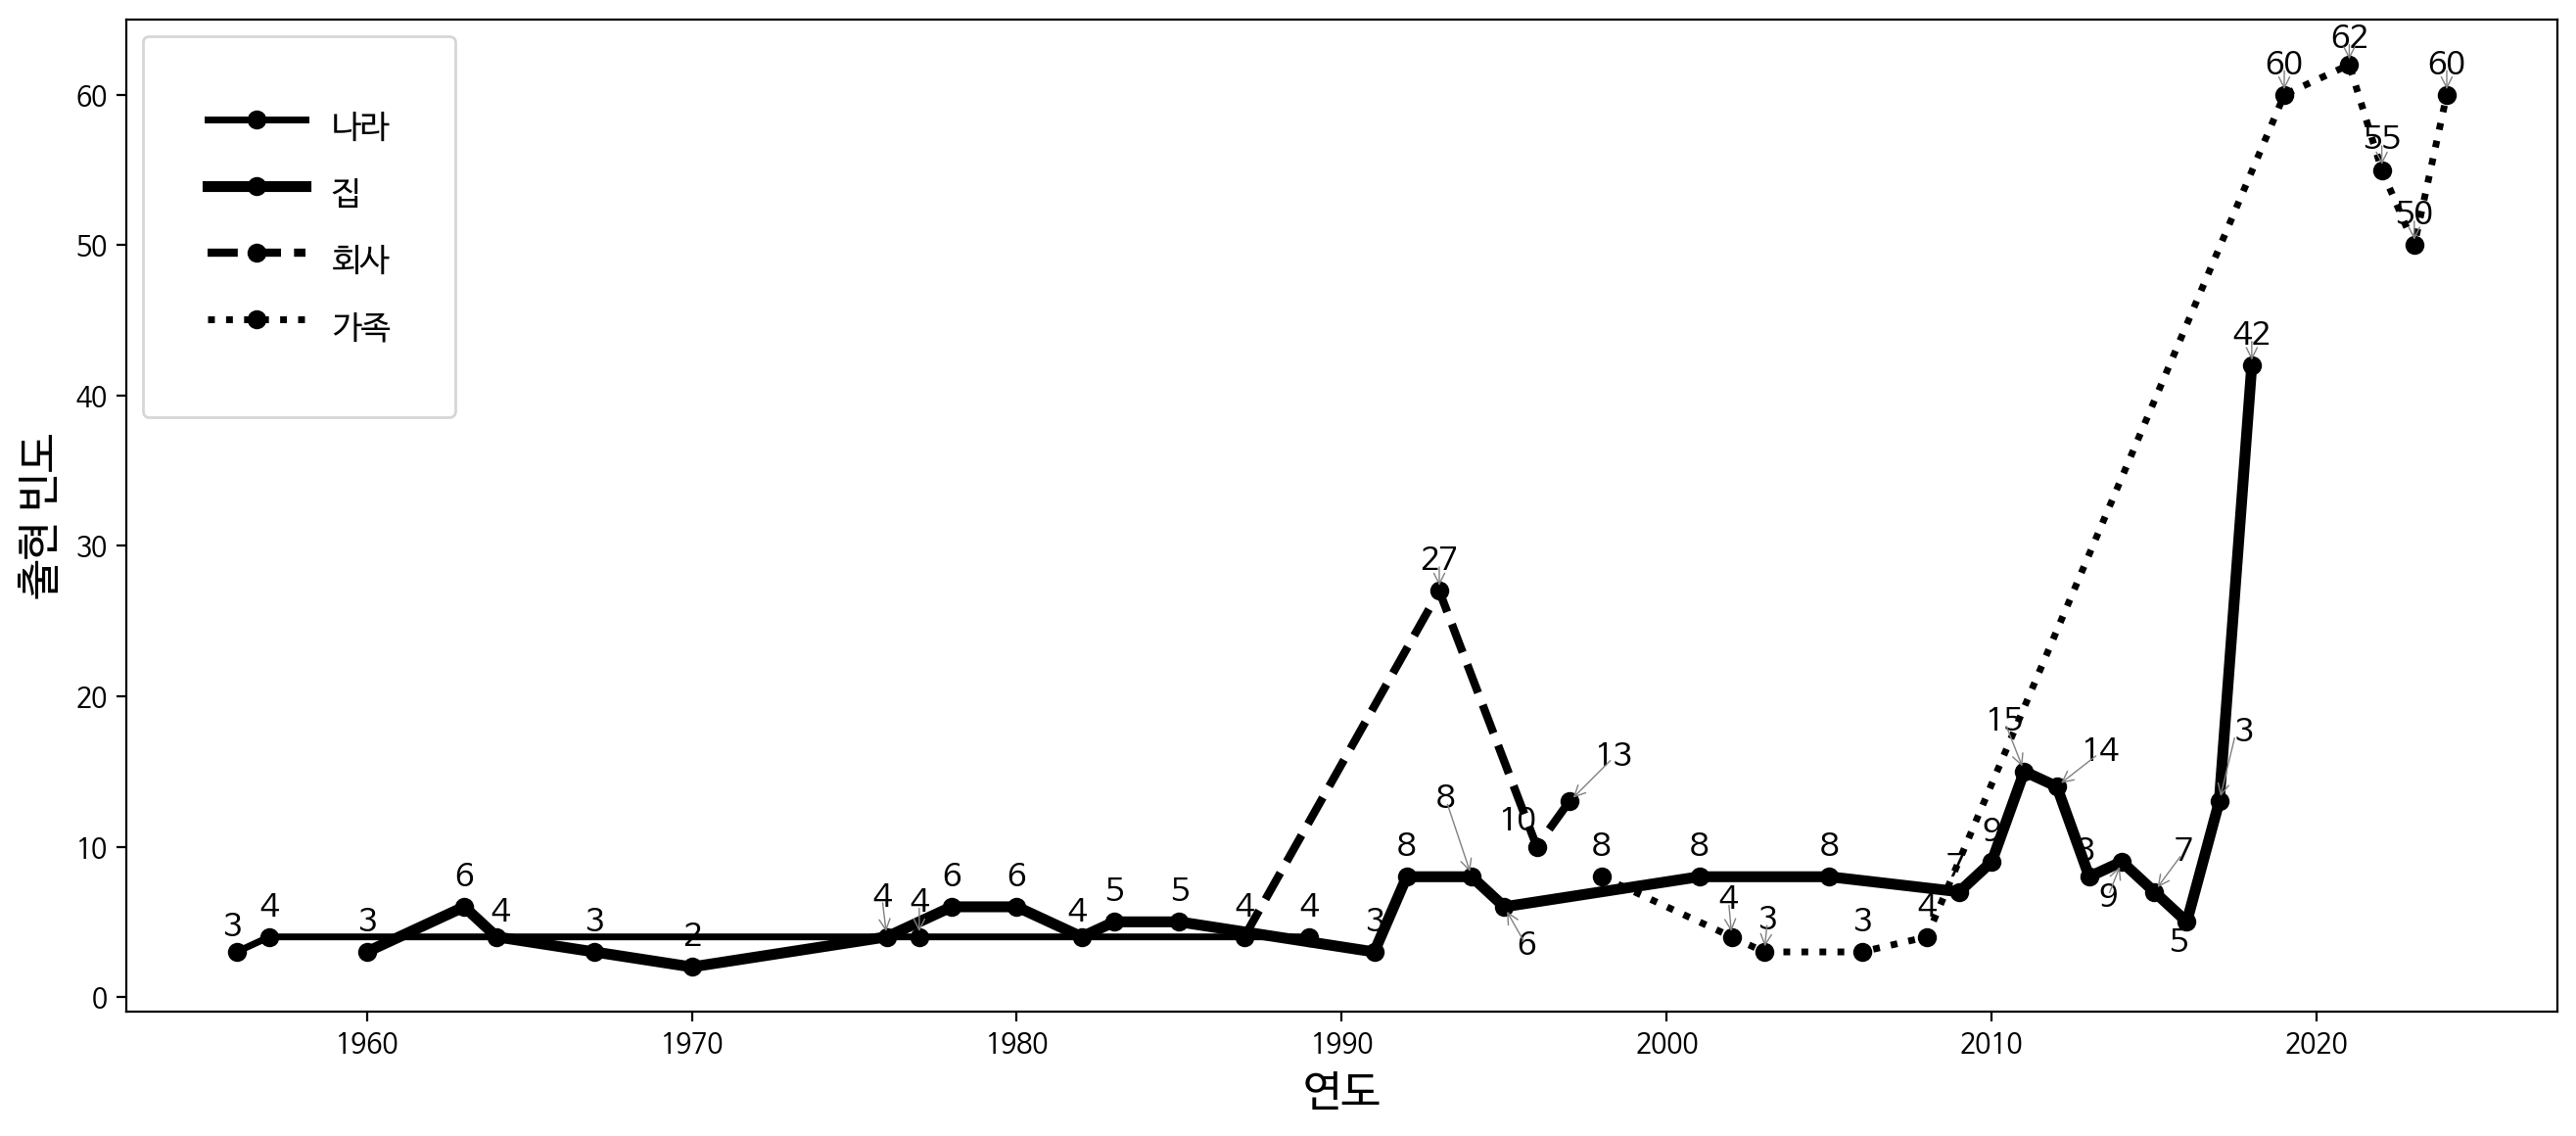

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
#논문용_전체_TOP 1
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Colab에서 고화질 렌더링을 위해 'retina' 설정
%config InlineBackend.figure_format = 'retina'

# Plot the top n n-grams by year with frequency labels
def plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, top_n=1, save_filename=None):
    # A4 용지의 3분의 1 크기 설정
    plt.figure(figsize=(13.27, 5.90))

    # 2024년 데이터에 대해 수집된 월수를 고려해 빈도 조정
    months_collected_2024 = 5
    total_months_in_year = 12

    # Calculate the adjustment factor for 2024 data
    top_ngrams_by_year['adjusted_frequency'] = top_ngrams_by_year.apply(
        lambda x: x['frequency'] * (total_months_in_year / months_collected_2024) if x['year'] == 2024 else x['frequency'],
        axis=1
    )

    # Sort the data and keep only the top 1 n-gram for each year based on the adjusted frequency
    top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(
        lambda x: x.nlargest(top_n, 'adjusted_frequency')
    ).reset_index(drop=True)

    # 단어가 4개 이상의 연도에서 등장한 것만 필터링
    ngram_year_counts = top_ngrams_by_year_sorted.groupby('ngram')['year'].nunique()
    frequent_ngrams = ngram_year_counts[ngram_year_counts >= 4].index
    top_ngrams_by_year_sorted = top_ngrams_by_year_sorted[top_ngrams_by_year_sorted['ngram'].isin(frequent_ngrams)]

    # 선 스타일을 다양하게 설정
    line_styles = ['-', '--', '-.', ':']

    # Plot the n-grams with different line styles and thicker for '집' and '회사'
    for idx, ngram in enumerate(top_ngrams_by_year_sorted['ngram'].unique()):
        yearly_data = top_ngrams_by_year_sorted[top_ngrams_by_year_sorted['ngram'] == ngram]
        line_style = line_styles[idx % len(line_styles)]  # 선 스타일 반복

        # '집'과 '회사'는 선 스타일 및 굵기를 조정해 시각적으로 구분
        if ngram == '집':
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle='-', color='black', linewidth=4, label=ngram)  # 더 굵은 실선
        elif ngram == '회사':
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle='--', color='black', linewidth=3, label=ngram)  # 더 굵은 점선
        else:
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle=line_style, color='black', linewidth=2.5, label=ngram)

    # Add text labels (only rounded numbers, no decimal places) for each point
    texts = []
    y_offset_map = {}  # To track identical frequencies in the same year

    for i, row in top_ngrams_by_year_sorted.iterrows():
        label = f"{int(round(row['adjusted_frequency']))}"  # 소수점 제외하고 정수로 표시
        year, freq = row['year'], row['adjusted_frequency']

        # Adjust y-offset if the frequency has been encountered before for this year
        if (year, freq) not in y_offset_map:
            y_offset_map[(year, freq)] = 0
        else:
            y_offset_map[(year, freq)] += 0.5  # 더 큰 오프셋 증가 (0.1에서 0.5로)

        y_offset = y_offset_map[(year, freq)]
        texts.append(plt.text(year, freq + y_offset, label, ha='center', va='bottom', fontsize=12))  # 숫자 크기 확대

    # Adjust the text to prevent overlap (Increased force values and spacing)
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
        expand_text=(2.0, 2.0),  # 텍스트 주변 공간을 더 넓게
        force_text=2.0,  # 텍스트 라벨 간격을 더 크게 설정
        force_points=1.0  # 데이터 포인트와 텍스트 간의 간격을 더 크게 설정
    )

    # Add title and labels
    plt.xlabel('연도', fontsize=16)  # X축 라벨 크기 확대
    plt.ylabel('출현 빈도', fontsize=16)  # Y축 라벨 크기 확대

    # 범례를 그래프 왼쪽 위로 이동 및 선과 겹치지 않게 설정, 범례 크기 확대
    plt.legend(loc='upper left', fontsize=12, title_fontsize=14,
               handlelength=3, handleheight=2, borderpad=2, bbox_to_anchor=(0, 1))  # 범례 크기 확대 및 위치 설정
    plt.tight_layout()

    # 그래프를 PDF 파일로 저장
    if save_filename:
        plt.savefig(save_filename, format='pdf', bbox_inches='tight')  # PDF 형식으로 저장

    plt.show()

# 그래프를 저장할 때 PDF 형식으로 저장
plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, 1, save_filename='years_all_adjusted.pdf')

from google.colab import files
files.download('years_all_adjusted.pdf')



##두 가지 저희 나눠 보기

In [24]:
df = pd.read_pickle('/content/v3_jeohui_040730_third_data_predictions.pickle')
df_jeopyeon = df[df['predicted_label'] == 0].copy()  # 저편의 저희
df_gyeomyang = df[df['predicted_label'] == 1].copy()  # 겸양의 저희

##겸양의 저희

In [25]:
df = pd.read_pickle('/content/v3_jeohui_040730_third_data_predictions.pickle')
df_gyeomyang = df[df['predicted_label'] == 1].copy()  # 겸양의 저희

In [26]:
df = df_gyeomyang

####매번할 필요 없음, 다음 셀부터 실행하면됨

In [ ]:
# This version will return a list of tuples, where each tuple contains (ngram, year, decade)
def find_ngrams_and_apply_custom_rules(texts, years, target_word, corrected_df, n=2):
    all_ngrams_list = []  # List to store (ngram, year, decade)

    for sentence, year in zip(texts, years):
        tokens = sentence.split()
        if target_word in tokens:
            idx = tokens.index(target_word)
            if idx + n <= len(tokens):
                ngram = " ".join(tokens[idx:idx + n])

                # Perform morphological analysis and extract only nouns
                morphs = kiwi.pos(ngram)
                filtered_ngram = " ".join([word for word, pos in morphs if pos.startswith('NN')])

                # Check if the filtered n-gram exists in the Extracted N-grams column and apply correction
                corrected_value = corrected_df.loc[corrected_df['Extracted N-grams'] == filtered_ngram, 'Corrected N-grams']

                # If there is a correction, use it, otherwise use the filtered n-gram without spaces
                if not corrected_value.empty:
                    filtered_ngram = corrected_value.values[0]  # Use the corrected value
                else:
                    filtered_ngram = filtered_ngram.replace(' ', '')  # Use the original but remove spaces

                if filtered_ngram:
                    decade = (year // 10) * 10  # Calculate the decade
                    all_ngrams_list.append((filtered_ngram, year, decade))  # Append the n-gram with year and decade

    return all_ngrams_list  # Return a list of tuples (ngram, year, decade)

# Apply the function with custom corrections based on the Excel data
ngrams_with_years = find_ngrams_and_apply_custom_rules(df['sentence'], df['year'], '저희', corrected_df, n=2)

# Create a DataFrame with the n-grams, year, and decade
ngrams_df = pd.DataFrame(ngrams_with_years, columns=['ngram', 'year', 'decade'])

# Create a function to calculate n-gram frequencies by year/decade
def calculate_ngram_frequencies(df, top_n=20):
    # Calculate frequency per year and decade
    frequency_by_year = df.groupby(['year', 'ngram']).size().reset_index(name='frequency')
    frequency_by_decade = df.groupby(['decade', 'ngram']).size().reset_index(name='frequency')

    # Get top n n-grams by year and decade
    top_ngrams_by_year = frequency_by_year.groupby('year').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)
    top_ngrams_by_decade = frequency_by_decade.groupby('decade').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)

    return top_ngrams_by_decade, top_ngrams_by_year

# Calculate top n n-grams by year and decade
top_ngrams_by_decade, top_ngrams_by_year = calculate_ngram_frequencies(ngrams_df, top_n=20)

# Export to Excel
with pd.ExcelWriter("ngram_analysis_gyeomyang.xlsx", engine='openpyxl') as writer:
    top_ngrams_by_decade.to_excel(writer, sheet_name='Top Ngrams by Decade', index=False)
    top_ngrams_by_year.to_excel(writer, sheet_name='Top Ngrams by Year', index=False)

print("Excel file created: ngram_analysis_gyeomyang.xlsx")



Excel file created: ngram_analysis_gyeomyang.xlsx


####여기로 건너뛰기

In [28]:
# n-gram 분석 결과를 엑셀 파일에서 불러오기
file_path = "/content/ngram_analysis_gyeomyang.xlsx"

# 엑셀 파일에서 시트별로 데이터프레임으로 읽어오기
top_ngrams_by_decade = pd.read_excel(file_path, sheet_name='Top Ngrams by Decade')
top_ngrams_by_year = pd.read_excel(file_path, sheet_name='Top Ngrams by Year')

# 데이터가 잘 불러와졌는지 확인
print(top_ngrams_by_decade.head())
print(top_ngrams_by_year.head())

   decade ngram  frequency
0    1950     집          5
1    1950     두          4
2    1950    사람          3
3    1950   원기소          2
4    1950    가정          1
   year ngram  frequency
0  1954     두          3
1  1954    사람          1
2  1954    성성          1
3  1954    직장          1
4  1955    가정          1


<ipython-input-29-08c1d9525134>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(


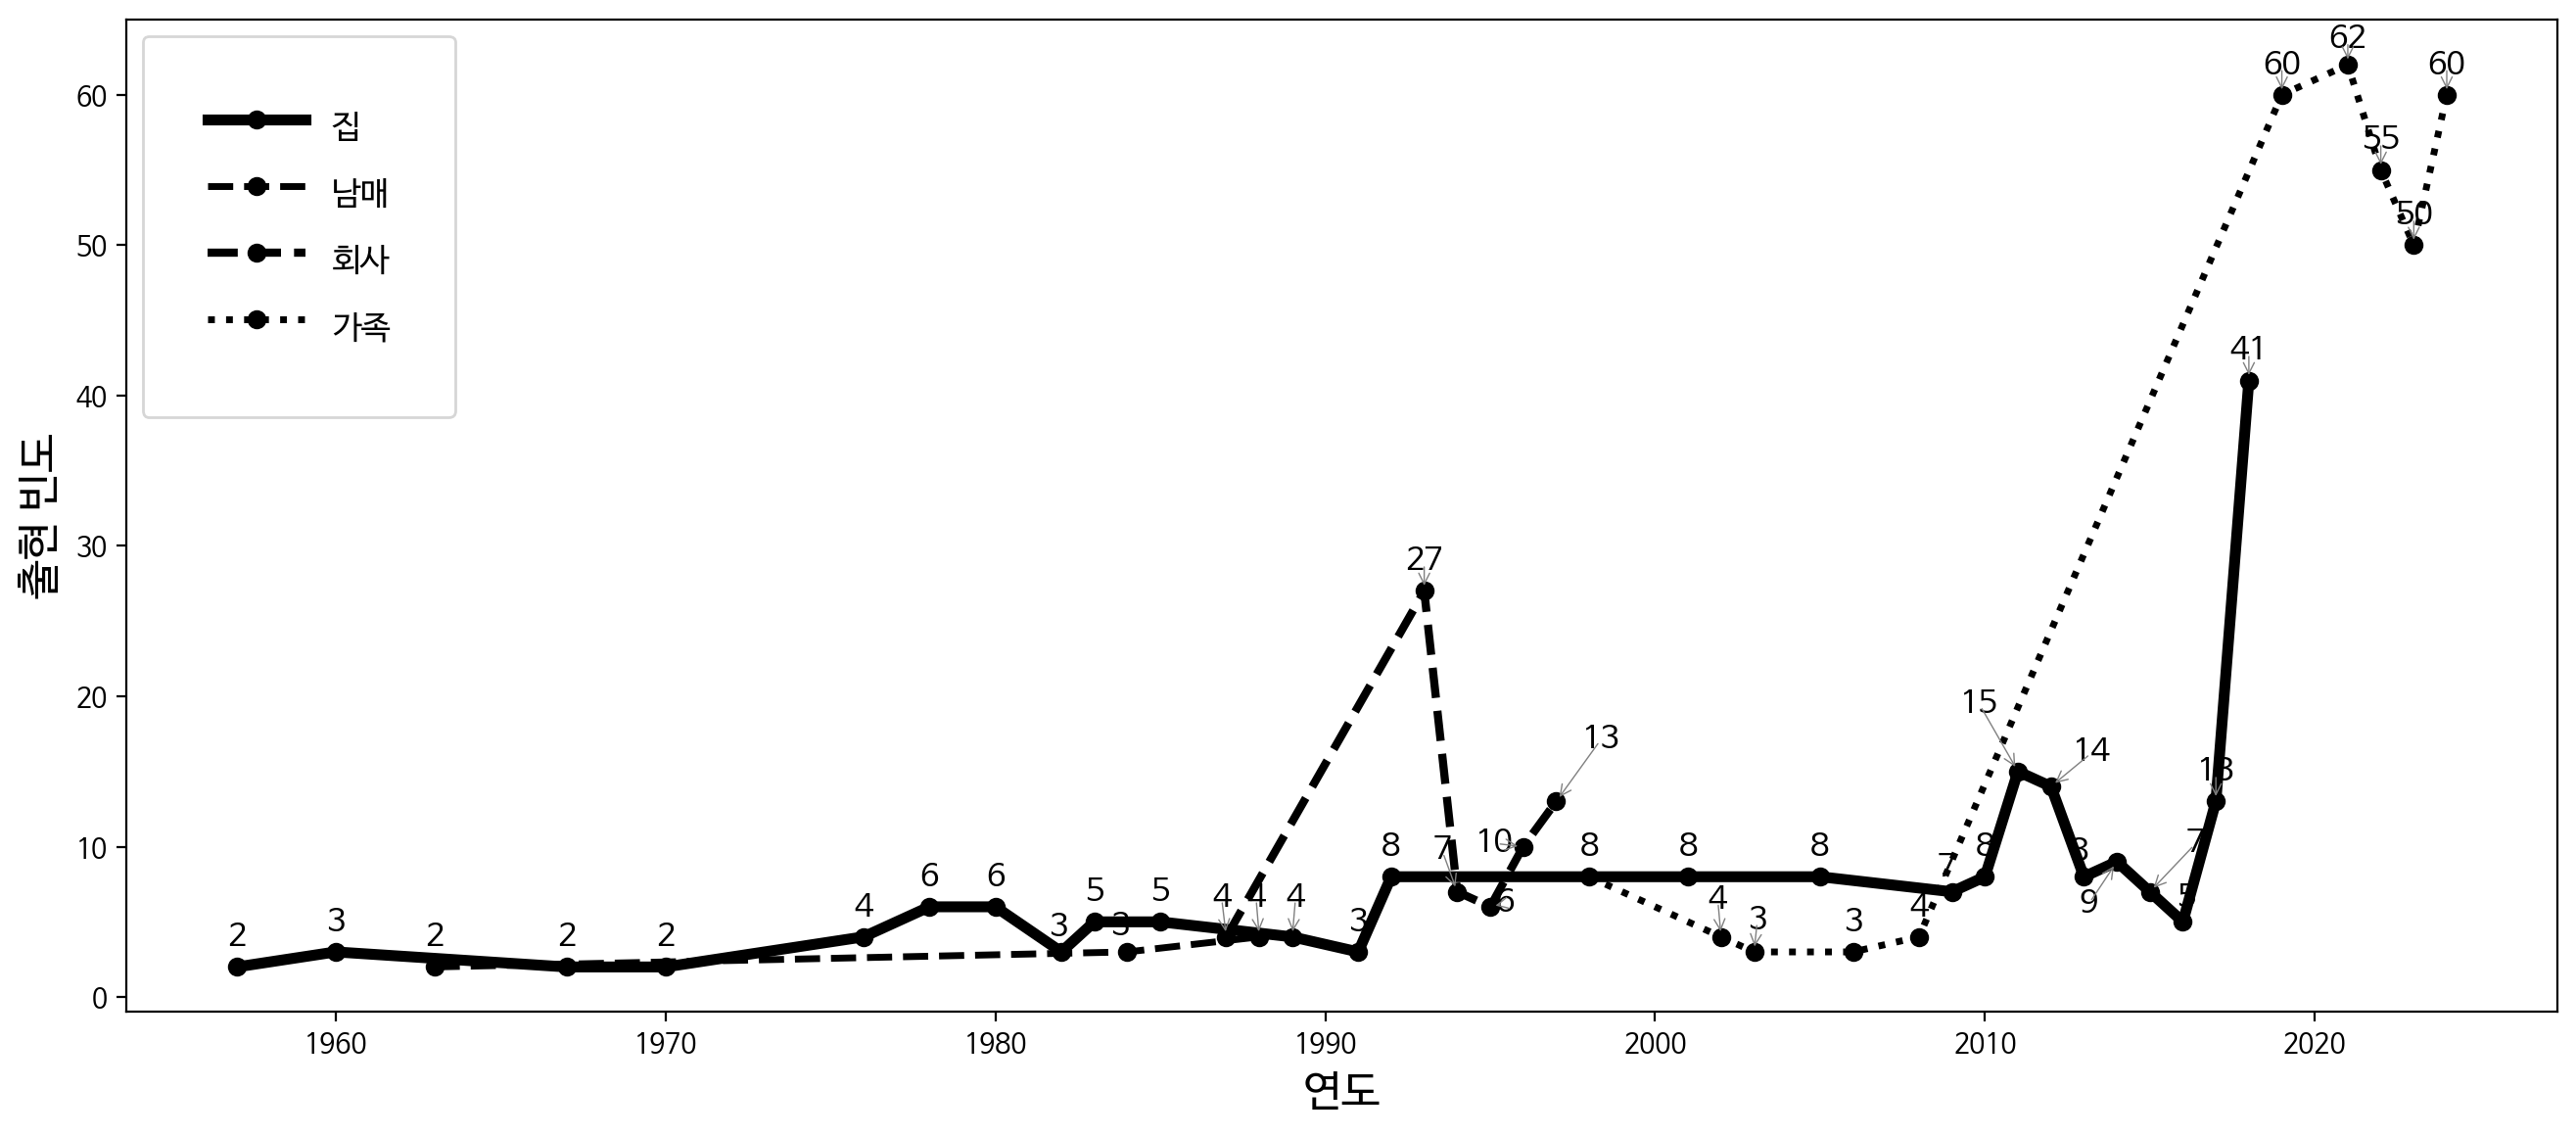

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
#겸양의 저희 TOP1
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Colab에서 고화질 렌더링을 위해 'retina' 설정
%config InlineBackend.figure_format = 'retina'

# Plot the top n n-grams by year with frequency labels
def plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, top_n=1, save_filename=None):
    # A4 용지의 3분의 1 크기 설정
    plt.figure(figsize=(13.27, 5.90))

    # 2024년 데이터에 대해 수집된 월수를 고려해 빈도 조정
    months_collected_2024 = 5
    total_months_in_year = 12

    # Calculate the adjustment factor for 2024 data
    top_ngrams_by_year['adjusted_frequency'] = top_ngrams_by_year.apply(
        lambda x: x['frequency'] * (total_months_in_year / months_collected_2024) if x['year'] == 2024 else x['frequency'],
        axis=1
    )

    # Sort the data and keep only the top 1 n-gram for each year based on the adjusted frequency
    top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(
        lambda x: x.nlargest(top_n, 'adjusted_frequency')
    ).reset_index(drop=True)

    # 단어가 3개 이상의 연도에서 등장한 것만 필터링
    ngram_year_counts = top_ngrams_by_year_sorted.groupby('ngram')['year'].nunique()
    frequent_ngrams = ngram_year_counts[ngram_year_counts >= 3].index
    top_ngrams_by_year_sorted = top_ngrams_by_year_sorted[top_ngrams_by_year_sorted['ngram'].isin(frequent_ngrams)]

    # 선 스타일을 다양하게 설정
    line_styles = ['-', '--', '-.', ':']

    # Plot the n-grams with different line styles and thicker for '집' and '회사'
    for idx, ngram in enumerate(top_ngrams_by_year_sorted['ngram'].unique()):
        yearly_data = top_ngrams_by_year_sorted[top_ngrams_by_year_sorted['ngram'] == ngram]
        line_style = line_styles[idx % len(line_styles)]  # 선 스타일 반복

        # '집'과 '회사'는 선 스타일 및 굵기를 조정해 시각적으로 구분
        if ngram == '집':
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle='-', color='black', linewidth=4, label=ngram)  # 더 굵은 실선
        elif ngram == '회사':
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle='--', color='black', linewidth=3, label=ngram)  # 더 굵은 점선
        else:
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle=line_style, color='black', linewidth=2.5, label=ngram)

    # Add text labels (only rounded numbers, no decimal places) for each point
    texts = []
    y_offset_map = {}  # To track identical frequencies in the same year

    for i, row in top_ngrams_by_year_sorted.iterrows():
        label = f"{int(round(row['adjusted_frequency']))}"  # 소수점 제외하고 정수로 표시
        year, freq = row['year'], row['adjusted_frequency']

        # Adjust y-offset if the frequency has been encountered before for this year
        if (year, freq) not in y_offset_map:
            y_offset_map[(year, freq)] = 0
        else:
            y_offset_map[(year, freq)] += 0.5  # 더 큰 오프셋 증가 (0.1에서 0.5로)

        y_offset = y_offset_map[(year, freq)]
        texts.append(plt.text(year, freq + y_offset, label, ha='center', va='bottom', fontsize=12))  # 숫자 크기 확대

    # Adjust the text to prevent overlap (Increased force values and spacing)
    adjust_text(
        texts,
        arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),
        expand_text=(2.0, 2.0),  # 텍스트 주변 공간을 더 넓게
        force_text=2.0,  # 텍스트 라벨 간격을 더 크게 설정
        force_points=1.0  # 데이터 포인트와 텍스트 간의 간격을 더 크게 설정
    )

    # Add title and labels
    plt.xlabel('연도', fontsize=16)  # X축 라벨 크기 확대
    plt.ylabel('출현 빈도', fontsize=16)  # Y축 라벨 크기 확대

     # 범례를 그래프 왼쪽 위로 이동 및 선과 겹치지 않게 설정, 범례 크기 확대
    plt.legend(loc='upper left', fontsize=12, title_fontsize=14,
               handlelength=3, handleheight=2, borderpad=2, bbox_to_anchor=(0, 1))  # 범례 크기 확대 및 위치 설정
    plt.tight_layout()


    # 그래프를 PDF 파일로 저장
    if save_filename:
        plt.savefig(save_filename, format='pdf', bbox_inches='tight')  # PDF 형식으로 저장

    plt.show()

# 그래프를 저장할 때 PDF 형식으로 저장
plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, 1, save_filename='years_all_adjusted.pdf')

from google.colab import files
files.download('years_all_adjusted.pdf')

##저편의 저희

In [31]:
df = pd.read_pickle('/content/v3_jeohui_040730_third_data_predictions.pickle')
df_jeopyeon = df[df['predicted_label'] == 0].copy()  # 저편의 저희

In [32]:
df = df_jeopyeon

####매번할 필요 없음

In [ ]:
# This version will return a list of tuples, where each tuple contains (ngram, year, decade)
def find_ngrams_and_apply_custom_rules(texts, years, target_word, corrected_df, n=2):
    all_ngrams_list = []  # List to store (ngram, year, decade)

    for sentence, year in zip(texts, years):
        tokens = sentence.split()
        if target_word in tokens:
            idx = tokens.index(target_word)
            if idx + n <= len(tokens):
                ngram = " ".join(tokens[idx:idx + n])

                # Perform morphological analysis and extract only nouns
                morphs = kiwi.pos(ngram)
                filtered_ngram = " ".join([word for word, pos in morphs if pos.startswith('NN')])

                # Check if the filtered n-gram exists in the Extracted N-grams column and apply correction
                corrected_value = corrected_df.loc[corrected_df['Extracted N-grams'] == filtered_ngram, 'Corrected N-grams']

                # If there is a correction, use it, otherwise use the filtered n-gram without spaces
                if not corrected_value.empty:
                    filtered_ngram = corrected_value.values[0]  # Use the corrected value
                else:
                    filtered_ngram = filtered_ngram.replace(' ', '')  # Use the original but remove spaces

                if filtered_ngram:
                    decade = (year // 10) * 10  # Calculate the decade
                    all_ngrams_list.append((filtered_ngram, year, decade))  # Append the n-gram with year and decade

    return all_ngrams_list  # Return a list of tuples (ngram, year, decade)

# Apply the function with custom corrections based on the Excel data
ngrams_with_years = find_ngrams_and_apply_custom_rules(df['sentence'], df['year'], '저희', corrected_df, n=2)

# Create a DataFrame with the n-grams, year, and decade
ngrams_df = pd.DataFrame(ngrams_with_years, columns=['ngram', 'year', 'decade'])

# Create a function to calculate n-gram frequencies by year/decade
def calculate_ngram_frequencies(df, top_n=20):
    # Calculate frequency per year and decade
    frequency_by_year = df.groupby(['year', 'ngram']).size().reset_index(name='frequency')
    frequency_by_decade = df.groupby(['decade', 'ngram']).size().reset_index(name='frequency')

    # Get top n n-grams by year and decade
    top_ngrams_by_year = frequency_by_year.groupby('year').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)
    top_ngrams_by_decade = frequency_by_decade.groupby('decade').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)

    return top_ngrams_by_decade, top_ngrams_by_year

# Calculate top n n-grams by year and decade
top_ngrams_by_decade, top_ngrams_by_year = calculate_ngram_frequencies(ngrams_df, top_n=20)

# Export to Excel
with pd.ExcelWriter("ngram_analysis_jeopyeon.xlsx", engine='openpyxl') as writer:
    top_ngrams_by_decade.to_excel(writer, sheet_name='Top Ngrams by Decade', index=False)
    top_ngrams_by_year.to_excel(writer, sheet_name='Top Ngrams by Year', index=False)

print("Excel file created: ngram_analysis_jeopyeon.xlsx")



Excel file created: ngram_analysis_jeopyeon.xlsx


<ipython-input-16-baaa1a0b0337>:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_year = frequency_by_year.groupby('year').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index(drop=True)
<ipython-input-16-baaa1a0b0337>:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_decade = frequency_by_decade.groupby('decade').apply(lambda x: x.nlargest(top_n, 'frequency')).reset_index

####여기로 오기

In [34]:
# n-gram 분석 결과를 엑셀 파일에서 불러오기
file_path = "//content/drive/Shareddrives/DHKP/2021-2023.기존연구/03. AI융합연구_우리나라_저희(21년_9-12월)/[서재현] 저희/ngram_analysis_jeopyeon.xlsx"

# 엑셀 파일에서 시트별로 데이터프레임으로 읽어오기
top_ngrams_by_decade = pd.read_excel(file_path, sheet_name='Top Ngrams by Decade')
top_ngrams_by_year = pd.read_excel(file_path, sheet_name='Top Ngrams by Year')

# 데이터가 잘 불러와졌는지 확인
print(top_ngrams_by_decade.head())
print(top_ngrams_by_year.head())

   decade ngram  frequency
0    1950    나라          8
1    1950     것          3
2    1950    동무          3
3    1950    고장          1
4    1950    군사          1
   year ngram  frequency
0  1954     것          2
1  1954    나라          1
2  1954    동무          1
3  1954    동생          1
4  1955     것          1


####연도별

<ipython-input-35-375d8bd5b032>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(


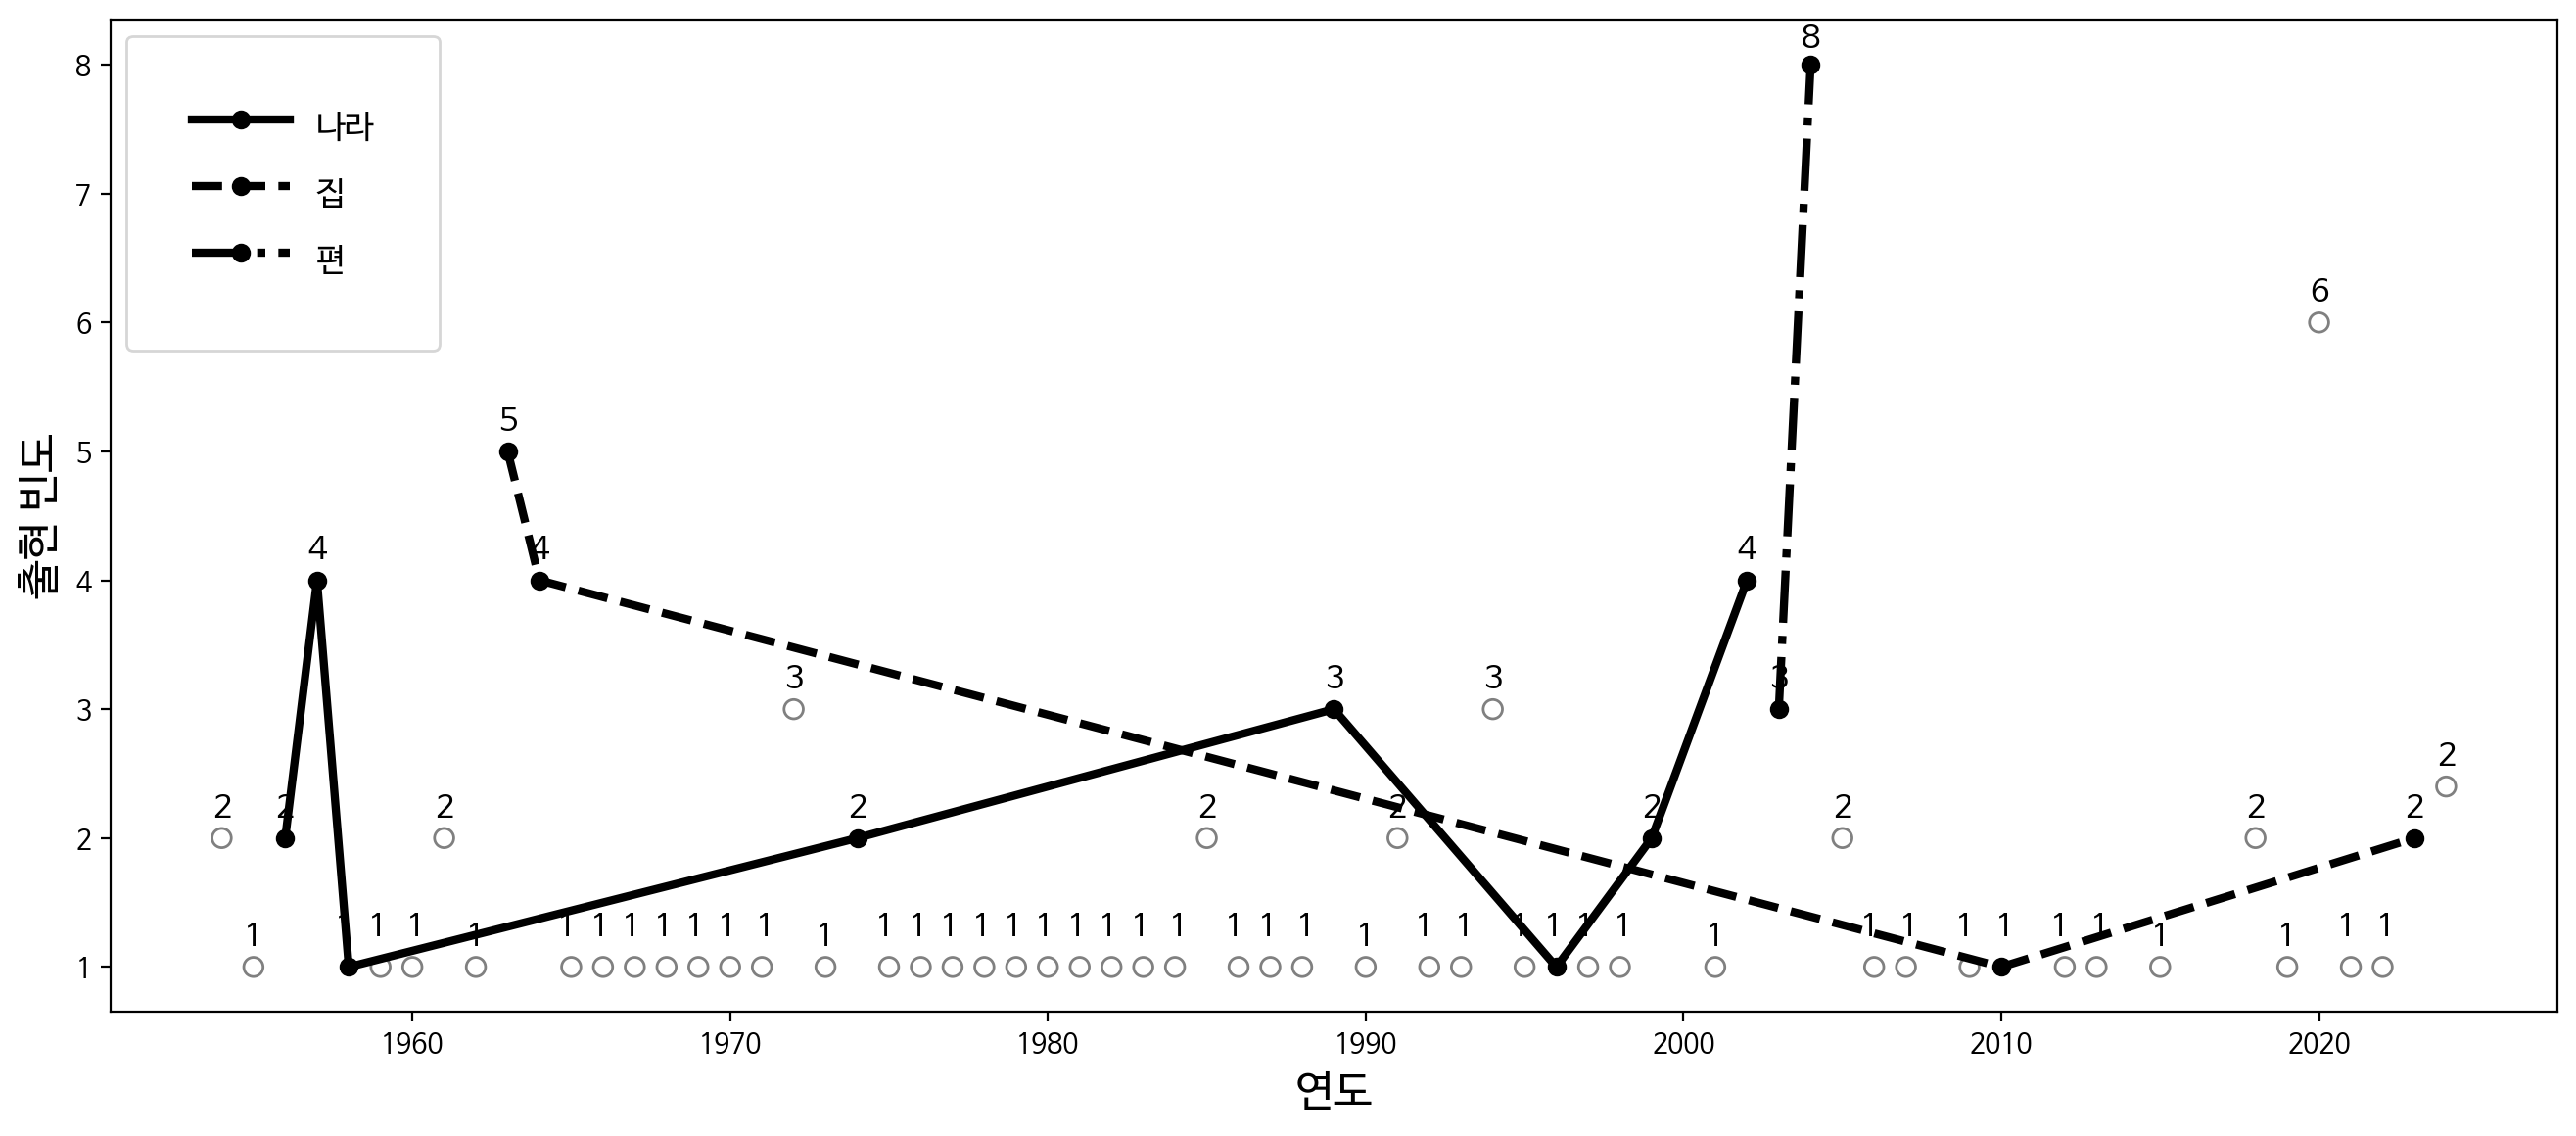

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Colab에서 고화질 렌더링을 위해 'retina' 설정
%config InlineBackend.figure_format = 'retina'

# Plot the top n n-grams by year with frequency labels
def plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, top_n=1, save_filename=None):
    # A4 용지의 3분의 1 크기 설정
    plt.figure(figsize=(13.27, 5.90))

    # 2024년 데이터에 대해 수집된 월수를 고려해 빈도 조정
    months_collected_2024 = 5
    total_months_in_year = 12

    # Calculate the adjustment factor for 2024 data
    top_ngrams_by_year['adjusted_frequency'] = top_ngrams_by_year.apply(
        lambda x: x['frequency'] * (total_months_in_year / months_collected_2024) if x['year'] == 2024 else x['frequency'],
        axis=1
    )

    # Sort the data and keep only the top 1 n-gram for each year based on the adjusted frequency
    top_ngrams_by_year_sorted = top_ngrams_by_year.groupby('year').apply(
        lambda x: x.nlargest(top_n, 'adjusted_frequency')
    ).reset_index(drop=True)

    # 선택된 n-그램: 나라, 집, 편만 선으로 표시
    highlight_ngrams = ['나라', '집', '편']

    # 선 스타일 설정
    line_styles = ['-', '--', '-.']  # 각각 다른 선 스타일

    # Plot 나라, 집, 편은 선 스타일로, 나머지는 빈 점으로 표시
    for idx, ngram in enumerate(top_ngrams_by_year_sorted['ngram'].unique()):
        yearly_data = top_ngrams_by_year_sorted[top_ngrams_by_year_sorted['ngram'] == ngram]
        if ngram in highlight_ngrams:
            # 나라, 집, 편은 각각 다르게 선 스타일 설정
            plt.plot(yearly_data['year'], yearly_data['adjusted_frequency'], marker='o', linestyle=line_styles[highlight_ngrams.index(ngram)], color='black', linewidth=3, label=ngram)
        else:
            # 나머지는 빈 점으로 표시 (점 크기 작게 설정)
            plt.scatter(yearly_data['year'], yearly_data['adjusted_frequency'], facecolors='none', edgecolors='gray', s=50)  # 점 크기를 50으로 줄임

    # Add text labels (only rounded numbers, no decimal places) for each point
    texts = []
    y_offset_map = {}  # To track identical frequencies in the same year

    for i, row in top_ngrams_by_year_sorted.iterrows():
        label = f"{int(round(row['adjusted_frequency']))}"  # 소수점 제외하고 정수로 표시
        year, freq = row['year'], row['adjusted_frequency']

        # Adjust y-offset if the frequency has been encountered before for this year
        if (year, freq) not in y_offset_map:
            y_offset_map[(year, freq)] = 0
        else:
            y_offset_map[(year, freq)] += 0.5  # 더 큰 오프셋 증가 (0.1에서 0.5로)

        y_offset = y_offset_map[(year, freq)]
        texts.append(plt.text(year, freq + y_offset, label, ha='center', va='bottom', fontsize=12))  # 숫자 크기 확대

    # Adjust the text to prevent overlap without drawing arrows
    adjust_text(
        texts,
        expand_text=(2.0, 2.0),  # 텍스트 주변 공간을 더 넓게
        force_text=2.0,  # 텍스트 라벨 간격을 더 크게 설정
        force_points=1.0  # 데이터 포인트와 텍스트 간의 간격을 더 크게 설정
    )

    # Add title and labels
    plt.xlabel('연도', fontsize=16)  # X축 라벨 크기 확대
    plt.ylabel('출현 빈도', fontsize=16)  # Y축 라벨 크기 확대

    # 범례에는 '나라', '집', '편'만 표시 (labels 제거)
    plt.legend(loc='upper left', fontsize=12, title_fontsize=14,
               handlelength=3, handleheight=2, borderpad=2, bbox_to_anchor=(0, 1))  # 범례 크기 확대 및 위치 설정
    plt.tight_layout()

    # 그래프를 PDF 파일로 저장
    if save_filename:
        plt.savefig(save_filename, format='pdf', bbox_inches='tight')  # PDF 형식으로 저장

    plt.show()

# 그래프를 저장할 때 PDF 형식으로 저장
plot_top_n_ngram_frequencies_by_year(top_ngrams_by_year, 1, save_filename='years_all_adjusted.pdf')

from google.colab import files
files.download('years_all_adjusted.pdf')
